# Activation functions

In [14]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

/home/m_zsuetam/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
n = int(1e3)

labels = []
for val in mnist.target:
    label = np.zeros(10)
    label[int(val)] = 1
    labels.append(label)

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data / 255.0,
    labels,
    test_size=0.2,
    shuffle=True
)
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n]
y_test = y_test[:n]

In [5]:
def relu(x):
    return (x >= 0) * x

def relu2deriv(x):
    return x >= 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid2deriv(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh2deriv(x):
    return 1 - (x ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

## Mini-batch Gradient Descent

Epoch: 110
 Train-Acc: 0.883 	 Test-Acc: 0.84
Epoch: 120
 Train-Acc: 0.887 	 Test-Acc: 0.844
Epoch: 130
 Train-Acc: 0.898 	 Test-Acc: 0.847
Epoch: 140
 Train-Acc: 0.902 	 Test-Acc: 0.848
Epoch: 150
 Train-Acc: 0.905 	 Test-Acc: 0.85
Epoch: 160
 Train-Acc: 0.906 	 Test-Acc: 0.854
Epoch: 170
 Train-Acc: 0.903 	 Test-Acc: 0.856
Epoch: 180
 Train-Acc: 0.913 	 Test-Acc: 0.857
Epoch: 190
 Train-Acc: 0.92 	 Test-Acc: 0.86
Epoch: 200
 Train-Acc: 0.923 	 Test-Acc: 0.859
Epoch: 210
 Train-Acc: 0.926 	 Test-Acc: 0.859
Epoch: 220
 Train-Acc: 0.924 	 Test-Acc: 0.859
Epoch: 230
 Train-Acc: 0.931 	 Test-Acc: 0.86
Epoch: 240
 Train-Acc: 0.925 	 Test-Acc: 0.858
Epoch: 250
 Train-Acc: 0.94 	 Test-Acc: 0.863
Epoch: 260
 Train-Acc: 0.931 	 Test-Acc: 0.859
Epoch: 270
 Train-Acc: 0.944 	 Test-Acc: 0.86
Epoch: 280
 Train-Acc: 0.939 	 Test-Acc: 0.86
Epoch: 290
 Train-Acc: 0.949 	 Test-Acc: 0.861


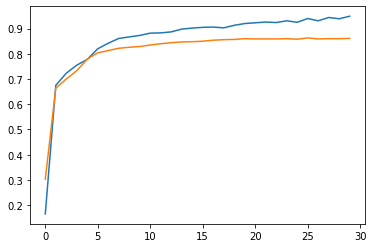

Epoch: 0
 Train-Acc: 0.199 	 Test-Acc: 0.405
Epoch: 10
 Train-Acc: 0.725 	 Test-Acc: 0.724
Epoch: 20
 Train-Acc: 0.762 	 Test-Acc: 0.748
Epoch: 30
 Train-Acc: 0.776 	 Test-Acc: 0.77
Epoch: 40
 Train-Acc: 0.81 	 Test-Acc: 0.788
Epoch: 50
 Train-Acc: 0.831 	 Test-Acc: 0.806
Epoch: 60
 Train-Acc: 0.85 	 Test-Acc: 0.816
Epoch: 70
 Train-Acc: 0.858 	 Test-Acc: 0.824
Epoch: 80
 Train-Acc: 0.865 	 Test-Acc: 0.831
Epoch: 90
 Train-Acc: 0.879 	 Test-Acc: 0.839
Epoch: 100
 Train-Acc: 0.877 	 Test-Acc: 0.835
Epoch: 110
 Train-Acc: 0.894 	 Test-Acc: 0.84
Epoch: 120
 Train-Acc: 0.882 	 Test-Acc: 0.843
Epoch: 130
 Train-Acc: 0.895 	 Test-Acc: 0.846
Epoch: 140
 Train-Acc: 0.903 	 Test-Acc: 0.845
Epoch: 150
 Train-Acc: 0.894 	 Test-Acc: 0.85
Epoch: 160
 Train-Acc: 0.91 	 Test-Acc: 0.85
Epoch: 170
 Train-Acc: 0.904 	 Test-Acc: 0.855
Epoch: 180
 Train-Acc: 0.914 	 Test-Acc: 0.854
Epoch: 190
 Train-Acc: 0.915 	 Test-Acc: 0.856
Epoch: 200
 Train-Acc: 0.916 	 Test-Acc: 0.858
Epoch: 210
 Train-Acc: 0.925 	 

In [16]:
batch_size = 100
alpha = 2
epochs = 300
hidden_size = 100

weights_0_1 = 0.02 * np.random.random((28 * 28, hidden_size)) - 0.01
weights_1_2 = 0.2 * np.random.random((hidden_size, 10)) - 0.1

train_acc_list = []
test_acc_list = []

for e in range(epochs):
    correct_cnt = 0
    for i in range(int(len(X_train) / batch_size)):
        batch_start = i * batch_size
        batch_end = (i + 1) * batch_size

        layer_0 = X_train[batch_start: batch_end]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        # print(layer_1, dropout_mask, dropout_mask*2, layer_1*dropout_mask*2)
        layer_1 *= dropout_mask * 2  # mnożymy przez 2, aby nie 'osłabić' wejścia następnej warstwy
        layer_2 = softmax(np.dot(layer_1, weights_1_2))

        # error += np.sum((y_train[batch_start: batch_end] - layer_2) ** 2)
        for k in range(batch_size):
            correct_cnt += int(
                np.argmax(layer_2[k:k + 1]) == np.argmax(y_train[batch_start + k: batch_start + k + 1])
            )

        layer_2_delta = (y_train[batch_start: batch_end] - layer_2) / ( batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if e % 10 == 0:

        test_correct_cnt = 0

        for i in range(len(X_test)):
            layer_0 = X_test[i:i + 1]
            layer_1 = tanh(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_correct_cnt += int(
                np.argmax(layer_2) == np.argmax(y_test[i:i + 1])
            )

        train_acc_list.append(correct_cnt / len(X_train))
        test_acc_list.append(test_correct_cnt / len(X_test))

        print(f"Epoch: {e}")
        print(f" Train-Acc: {correct_cnt / len(X_train):.4} "
              f"\t Test-Acc: {test_correct_cnt / len(X_test):.4}")

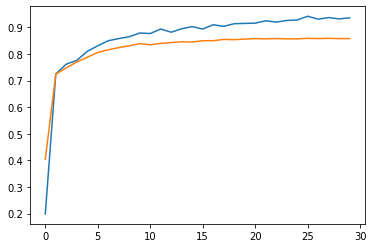

In [17]:
plt.plot(train_acc_list, label='train')
plt.plot(test_acc_list, label='test')

Gradient descent: od 4 min 34 s
```
Train-Err: 0.3154
Train-Acc: 0.903
Test-Err: 0.4271
Test-Acc: 0.786
```

Mini-batch gradient descent: 7 min 48 s
```
Train-Err: 0.3927
Train-Acc: 0.832
Test-Err: 0.4049
Test-Acc: 0.8
```

Mini-batch gradient descent with activation functions: 15 s
```
Train-Acc: 0.942
Test-Acc: 0.859
```

